In [1]:
#!pip install scikit-learn
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn
#!pip install tqdm
#!pip install statsmodels
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import datetime as dt

ModuleNotFoundError: No module named 'pandas'

In [3]:
os.getcwd()

'/Users/samuelchazy/ML_files_X/Applied_Projects/Competitions/Kaggle/Predict_Future_Sales'

# Get the files & drop null values

In [4]:
file_1='data/sales_train.csv'
file_2='data/shops.csv'
file_3='data/item_categories.csv'
file_4='data/items.csv'

# File 1

In [5]:
df_train = pd.read_csv(file_1)
df_train = df_train.rename(columns={'item_cnt_day':'qt_sold_per_day'})
df_train['date'] = pd.to_datetime(df_train['date'],format="%d.%m.%Y")
df_train.tail(2)

,date,date_block_num,shop_id,item_id,item_price,qt_sold_per_day
2935847,2015-10-22,33,25,7440,299.0,1.0
2935848,2015-10-03,33,25,7460,299.0,1.0


In [6]:
df_train.shape

(2935849, 6)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   date_block_num   int64         
 2   shop_id          int64         
 3   item_id          int64         
 4   item_price       float64       
 5   qt_sold_per_day  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [8]:
df_train.isna().sum()

date               0
date_block_num     0
shop_id            0
item_id            0
item_price         0
qt_sold_per_day    0
dtype: int64

# File 2

In [9]:
df_two = pd.read_csv(file_2)
df_two.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [10]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
df_two.isna().sum()

shop_name    0
shop_id      0
dtype: int64

# File 3

In [12]:
df_three = pd.read_csv(file_3)
df_three.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [13]:
df_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [14]:
df_three.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

# File 4

In [15]:
df_four = pd.read_csv(file_4)
df_four.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [16]:
df_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [17]:
df_four.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

# Merge files

In [18]:
display(df_train.head(1))
display(df_two.head(1))
display(df_three.head(1))
display(df_four.head(1))

,date,date_block_num,shop_id,item_id,item_price,qt_sold_per_day
0,2013-01-02,0,59,22154,999.0,1.0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40


In [19]:
# df_one = sales_train # df_two = shops # df_three = item_categories # df_four = items

def merge_files(df,df_two,df_three,df_four):
    
    ################################################## Features #####################################################################
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['tenure'] = df['date'].max() - df['date']
    df['tenure'] = df['tenure'].apply(lambda x: x.total_seconds())
    df['tenure'] = df['tenure'] / 86400
    df['tenure'] = df['tenure'].astype(int)
    
    ################################################## Collapse files to per month ##################################################
    # df = df.groupby(['date_block_num','shop_id','item_id'],as_index=False).agg({'month':'last','item_price':'last','qt_sold_per_day':'sum'}).reset_index(drop=True)
    # df = df.rename(columns={'qt_sold_per_day':'item_cnt_month'})


    ################################################## Merging files ################################################################   
    df_merged = pd.merge(left=df,right=df_four,how='left',on='item_id')
    df_merged = df_merged.loc[:,['date_block_num','month','tenure','shop_id','item_id','item_price','qt_sold_per_day']]

    ################################################## Output #######################################################################
    return df_merged


In [20]:
df_merged = merge_files(df_train,df_two,df_three,df_four)
df_merged

,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day
0,0,1,1032,59,22154,999.00,1.0
1,0,1,1031,25,2552,899.00,1.0
2,0,1,1029,25,2552,899.00,-1.0
3,0,1,1028,25,2554,1709.05,1.0
4,0,1,1019,25,2555,1099.00,1.0
...,...,...,...,...,...,...,...
2935844,33,10,21,25,7409,299.00,1.0
2935845,33,10,22,25,7460,299.00,1.0
2935846,33,10,17,25,7459,349.00,1.0
2935847,33,10,9,25,7440,299.00,1.0


In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date_block_num   int64  
 1   month            int64  
 2   tenure           int64  
 3   shop_id          int64  
 4   item_id          int64  
 5   item_price       float64
 6   qt_sold_per_day  float64
 7   cluster          int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 190.4 MB


In [36]:
df_merged = df_merged[df_merged['qt_sold_per_day'] > 0]
df_merged

,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day,cluster
0,0,1,1032,59,22154,999.00,1.0,3
1,0,1,1031,25,2552,899.00,1.0,2
3,0,1,1028,25,2554,1709.05,1.0,2
4,0,1,1019,25,2555,1099.00,1.0,2
5,0,1,1024,25,2564,349.00,1.0,2
...,...,...,...,...,...,...,...,...
2935844,33,10,21,25,7409,299.00,1.0,2
2935845,33,10,22,25,7460,299.00,1.0,2
2935846,33,10,17,25,7459,349.00,1.0,2
2935847,33,10,9,25,7440,299.00,1.0,2


In [37]:
display(f'shape of df_one    = {df_train.shape}')
display(f'shape of df_merged = {df_merged.shape}')
print(f'{df_merged.isna().sum()}')

'shape of df_one    = (2935849, 9)'

'shape of df_merged = (2928493, 8)'

date_block_num     0
month              0
tenure             0
shop_id            0
item_id            0
item_price         0
qt_sold_per_day    0
cluster            0
dtype: int64


In [38]:
# df_merged['item_name'] = df_merged['item_name'].astype('category')
# df_merged['item_name'] = df_merged['item_name'].cat.codes
# df_merged

# Monovariate analysis

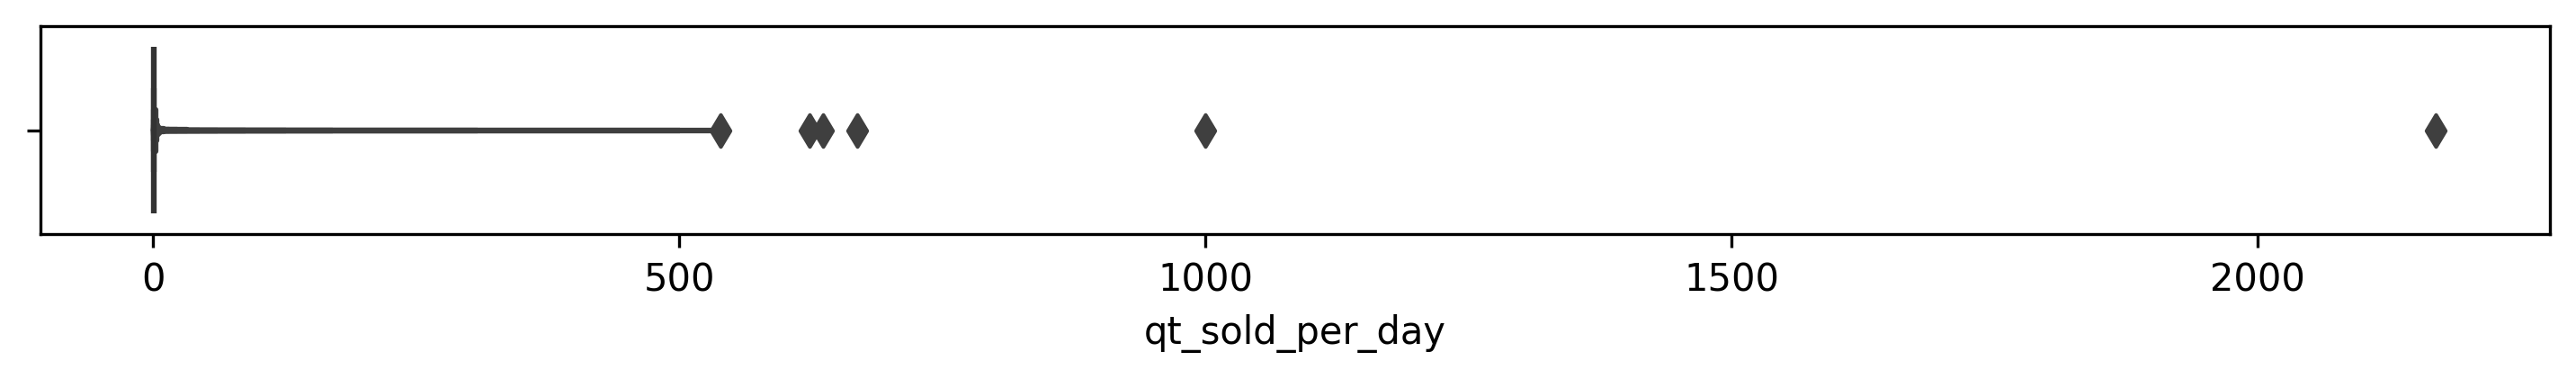

In [39]:
ax,fig = plt.subplots(figsize=(12,1),dpi=300)
ax = sns.boxenplot(x=df_merged['qt_sold_per_day'])

In [40]:
df_merged_outlier = df_merged.copy()

lower_bound = df_merged_outlier['qt_sold_per_day'].mean() - 3*df_merged_outlier['qt_sold_per_day'].std()
higher_bound = df_merged_outlier['qt_sold_per_day'].mean() + 3*df_merged_outlier['qt_sold_per_day'].std()

df_merged_outlier = df_merged_outlier[(df_merged_outlier['qt_sold_per_day'] > lower_bound) & (df_merged_outlier['qt_sold_per_day'] < higher_bound)]
df_merged_outlier.head(1)

,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day,cluster
0,0,1,1032,59,22154,999.0,1.0,3


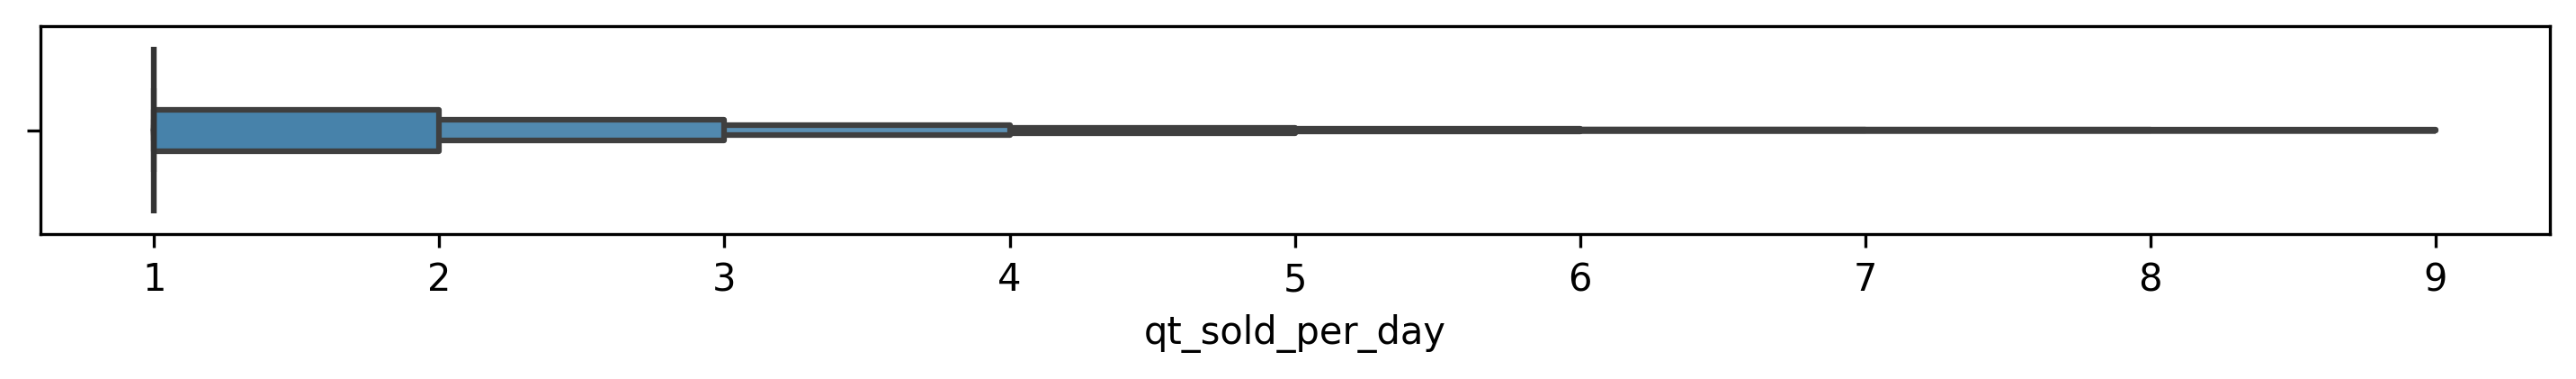

In [41]:
df_merged_outlier = df_merged_outlier[df_merged_outlier['qt_sold_per_day'] > 0]
df_merged_outlier = df_merged_outlier.reset_index(drop=True)

ax,fig = plt.subplots(figsize=(12,1),dpi=300)
ax = sns.boxenplot(x=df_merged_outlier['qt_sold_per_day'])

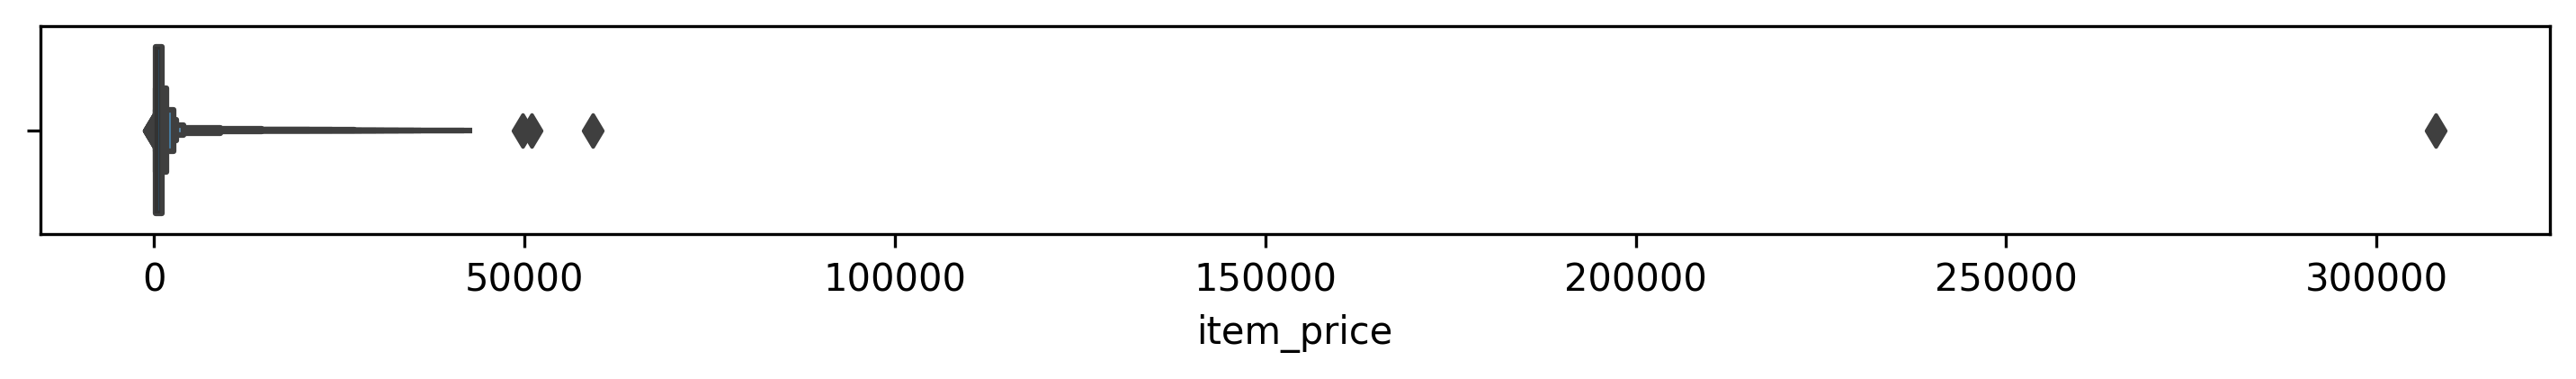

In [42]:
ax,fig = plt.subplots(figsize=(12,1),dpi=300)
ax = sns.boxenplot(x=df_merged_outlier['item_price'])

In [43]:
lower_bound = df_merged_outlier['item_price'].mean() - 3*df_merged_outlier['item_price'].std()
higher_bound = df_merged_outlier['item_price'].mean() + 3*df_merged_outlier['item_price'].std()

df_merged_outlier = df_merged_outlier[(df_merged_outlier['item_price'] > lower_bound) & (df_merged_outlier['item_price'] < higher_bound)]
df_merged_outlier.head(1)

,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day,cluster
0,0,1,1032,59,22154,999.0,1.0,3


In [44]:
df_merged_outlier = df_merged_outlier[df_merged_outlier['item_price'] > 0]
df_merged_outlier = df_merged_outlier.reset_index(drop=True)

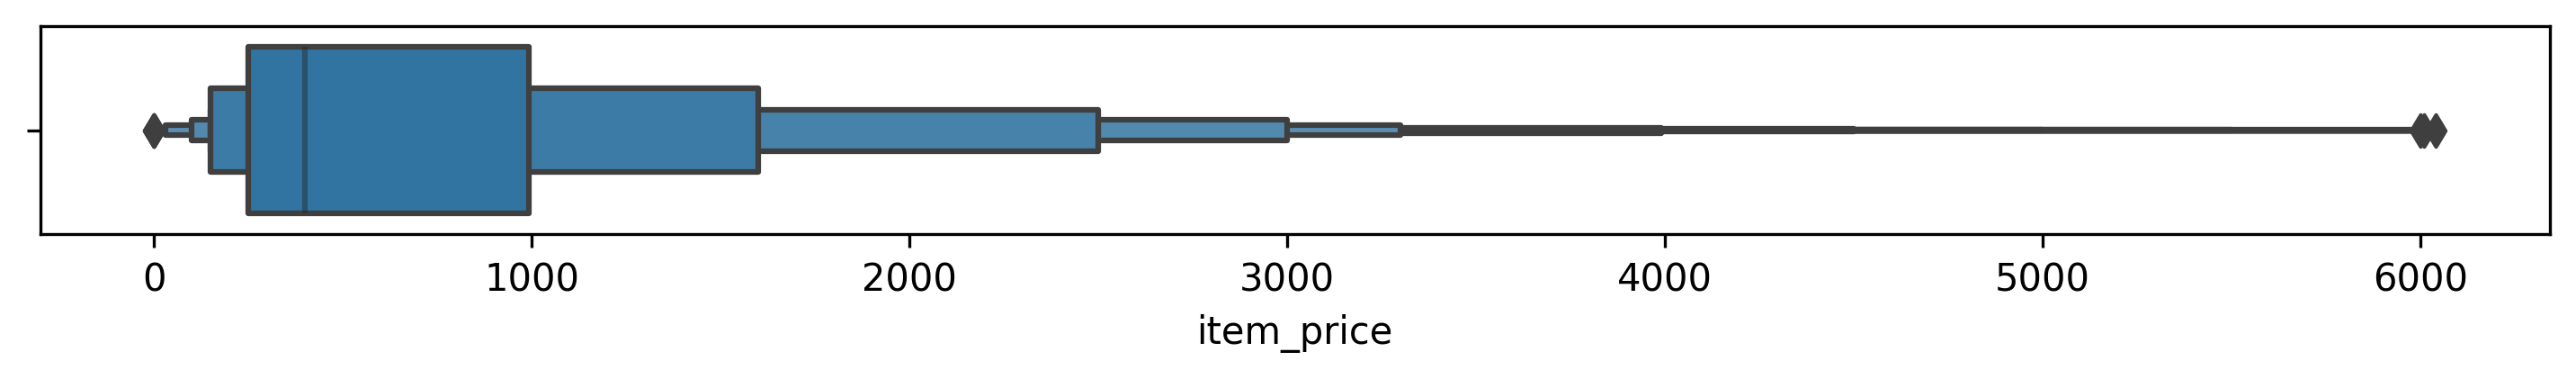

In [45]:
ax,fig = plt.subplots(figsize=(12,1),dpi=300)
ax = sns.boxenplot(x=df_merged_outlier['item_price'])

In [46]:
df_merged_outlier['item_price'].min()

0.07

# Bivariate analysis

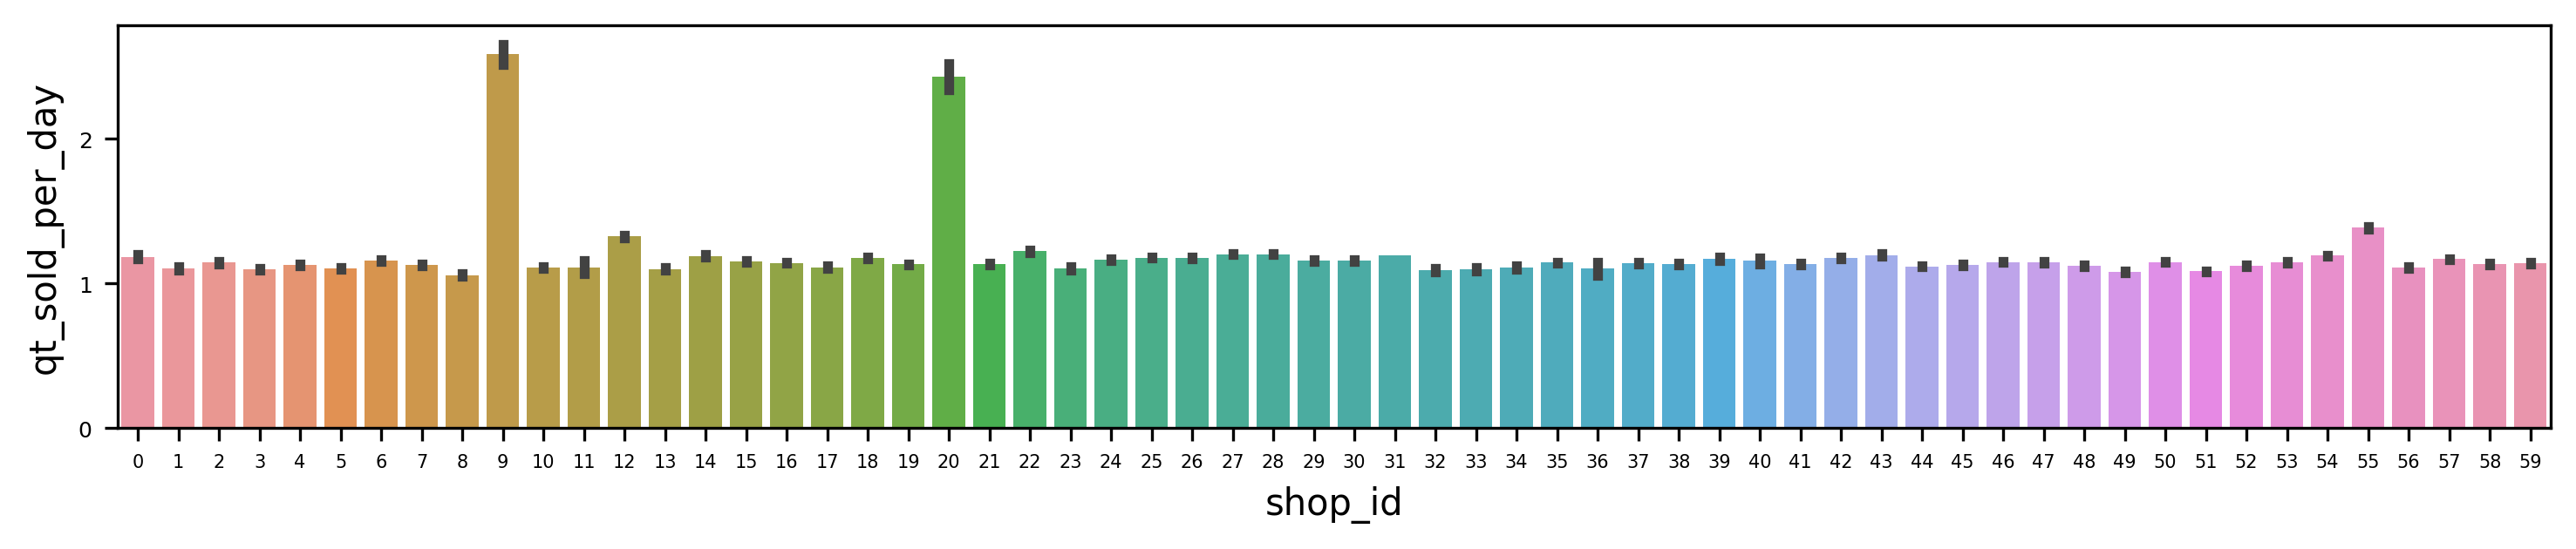

In [47]:
ax,fig = plt.subplots(figsize=(12,2),dpi=300)
ax = sns.barplot(x=df_merged_outlier['shop_id'],y=df_merged_outlier['qt_sold_per_day'])
plt.xticks(rotation=0,fontsize=5)
plt.yticks(rotation=0,fontsize=6);

In [48]:
# ax,fig = plt.subplots(figsize=(12,2),dpi=300)
# ax = sns.barplot(x=df_merged_outlier['item_category_id'],y=df_merged_outlier['qt_sold_per_day'])
# plt.xticks(rotation=0,fontsize=5)
# plt.yticks(rotation=0,fontsize=6);

# Correlation matrix

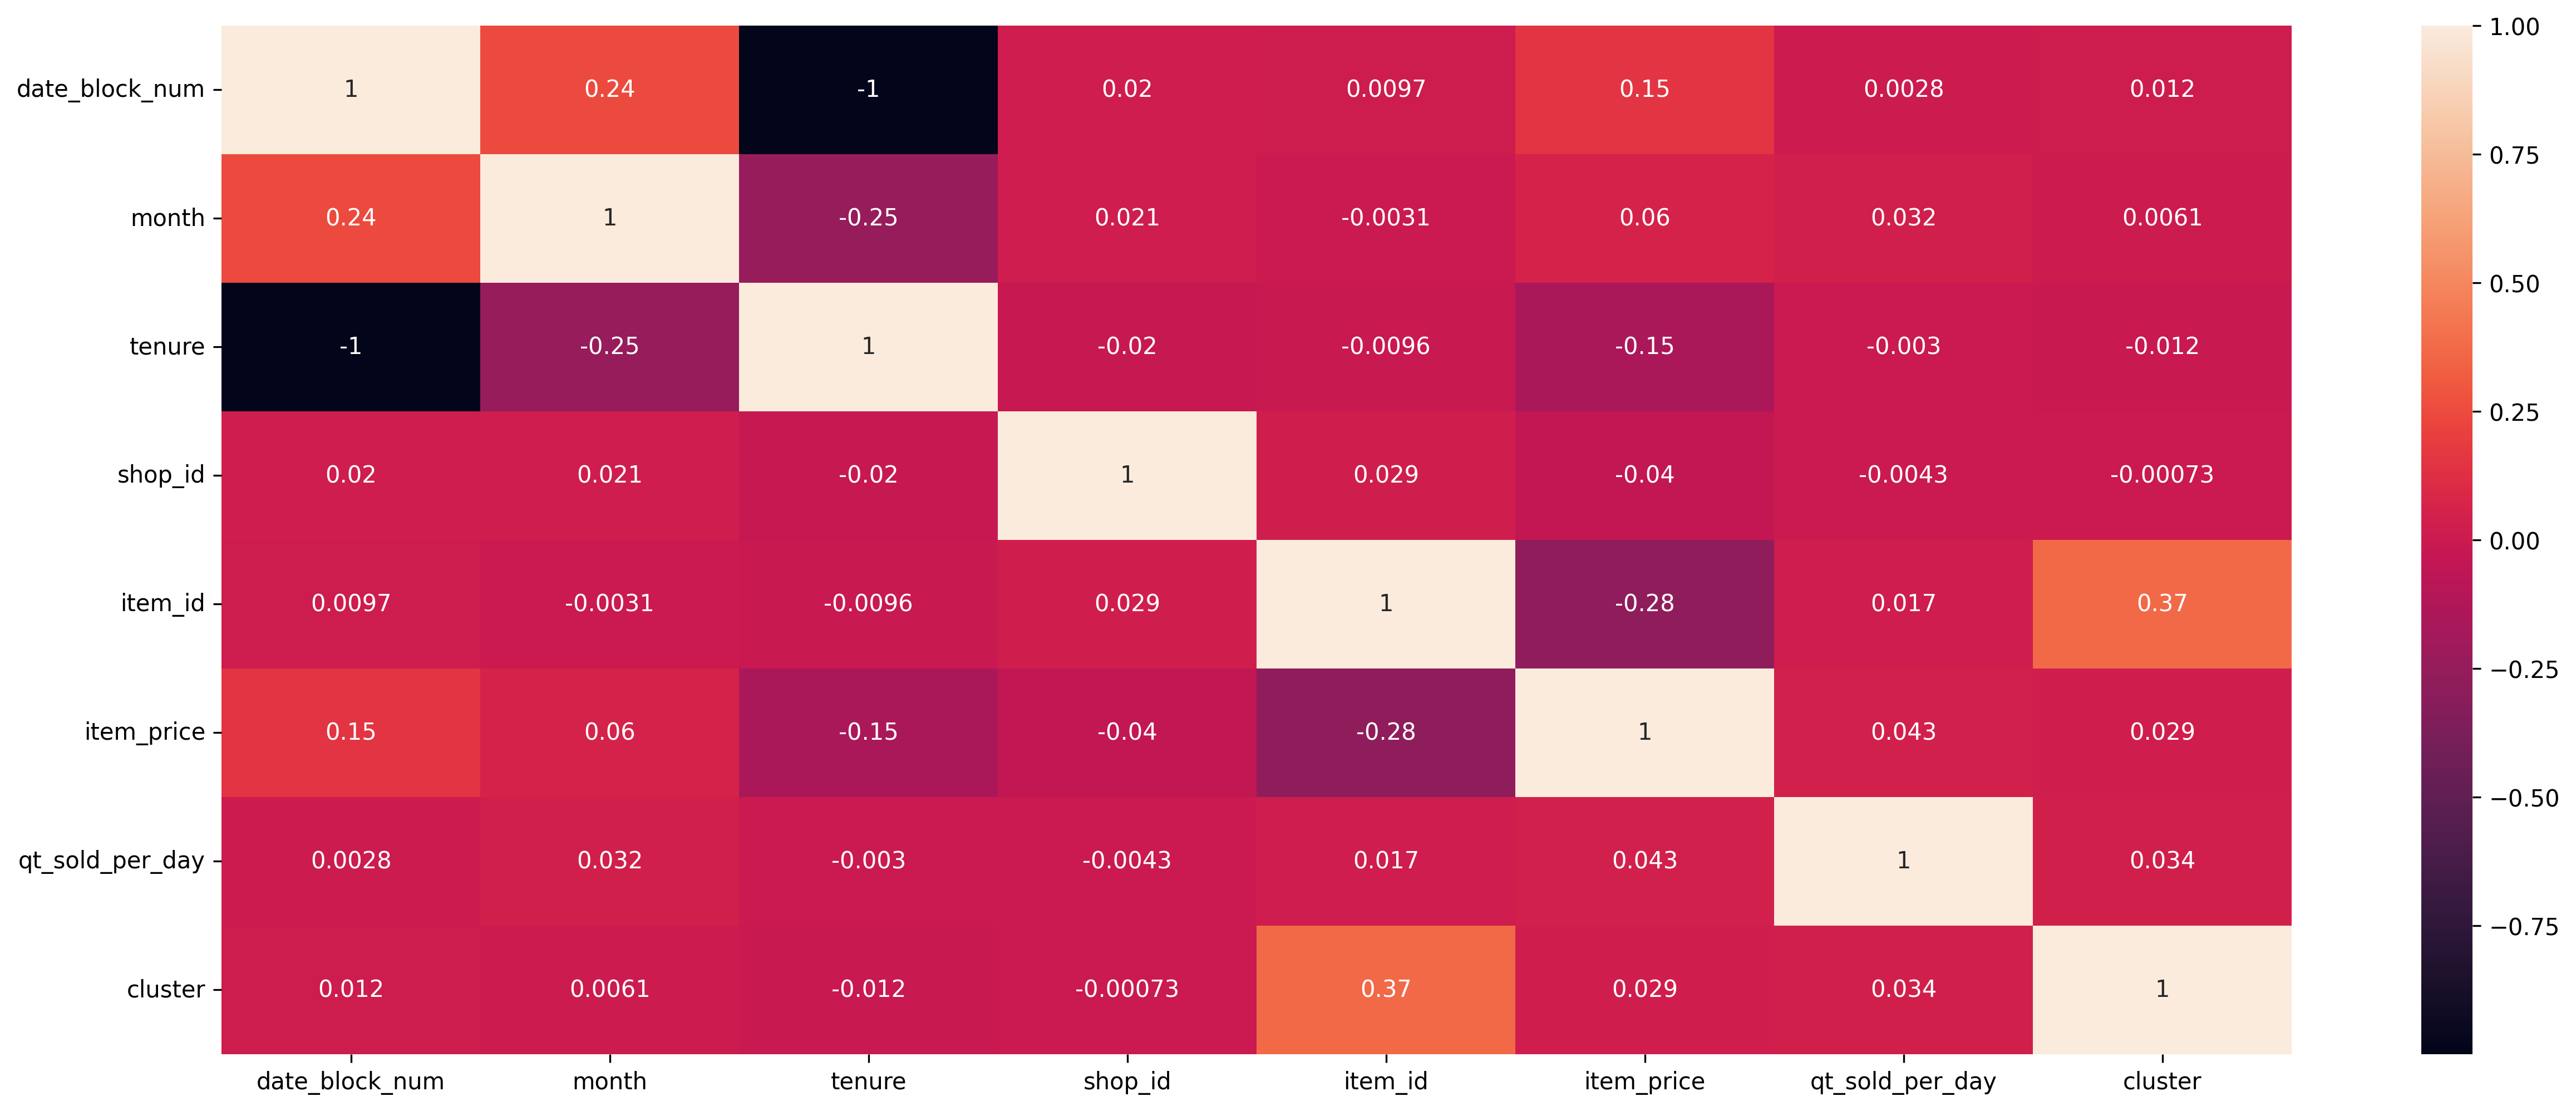

In [49]:
cor  = df_merged_outlier.corr()

ax,fig = plt.subplots(figsize=(20,8),dpi=300)
ax = sns.heatmap(data=cor,annot=True)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_merged_outlier.columns
vif['vif_Factor'] = [variance_inflation_factor(df_merged_outlier.values, i) for i in range(df_merged_outlier.shape[1])]
vif.loc[(vif['vif_Factor'] >= 5) & (vif['vif_Factor'] < 10), 'vif_Factor_Description'] = 'Concerning'
vif.loc[vif['vif_Factor'] >= 10, 'vif_Factor_Description'] = 'Problematic'
vif[vif['vif_Factor_Description'].isna() == False]

,features,vif_Factor,vif_Factor_Description
0,date_block_num,7.267273,Concerning
2,tenure,8.160566,Concerning
3,shop_id,5.154723,Concerning
7,cluster,10.028904,Problematic


# Step 1: Predict missing prices from the test dataset

### Get the test data

In [54]:
file_5='data/test.csv'

In [55]:
df_test = pd.read_csv(file_5)
print(df_test.shape)
df_test.head(2)

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


### Get the average price of items through the years

In [56]:
sales = df_merged_outlier.groupby(by=['item_id'],as_index=False)['item_price'].agg('last')
print(sales.shape)
sales.head(1)

(21567, 2)


,item_id,item_price
0,0,58.0


### Iterate through the test data & fill in the prices

In [57]:
df_test_prices = df_test.copy()
df_test_prices['item_price'] = 0

In [58]:
for i,item_A in tqdm(enumerate(sales['item_id'])):
    for j,item_B in enumerate(df_test_prices['item_id']):
        if item_A == item_B:
            df_test_prices.loc[j,'item_price'] = sales.loc[i,'item_price']

df_test_prices.head()

21567it [06:38, 54.06it/s]


,ID,shop_id,item_id,item_price
0,0,5,5037,1499.0
1,1,5,5320,0.0
2,2,5,5233,1199.0
3,3,5,5232,1199.0
4,4,5,5268,0.0


### Filter the test data with prices / no prices

In [59]:
df_test_prices_test = df_test_prices.copy()
df_test_prices_test = df_test_prices_test[df_test_prices_test['item_price']==0]
df_test_prices_test.head(2)

,ID,shop_id,item_id,item_price
1,1,5,5320,0.0
4,4,5,5268,0.0


In [60]:
df_test_prices_predict = df_test_prices.copy()
df_test_prices_predict = df_test_prices_predict[df_test_prices_predict['item_price'] != 0]
df_test_prices_predict.head(2)

,ID,shop_id,item_id,item_price
0,0,5,5037,1499.0
2,2,5,5233,1199.0


In [61]:
df_test_prices_predict['item_price'].max()

5999.5

### Predict the missing prices

In [62]:
X_price = df_test_prices_predict.drop('item_price',axis=1)
y_price = df_test_prices_predict['item_price']

In [67]:
from sklearn.model_selection import train_test_split
import xgboost

X_train_price,X_test_price,y_train_price,y_test_price = train_test_split(X_price,y_price,test_size=0.2,shuffle=True)

import xgboost

xgb_model_price = xgboost.XGBRegressor(n_estimators=1250,max_depth=10)
xgb_model_price.fit(X_train_price,y_train_price)

y_pred_xgboost_price = xgb_model_price.predict(X_test_price)

In [68]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae_price = round(mean_absolute_error(y_test_price,y_pred_xgboost_price),3)
print(f'MAE = {mae_price}')
print('-'*80)

mse_price = round(mean_squared_error(y_test_price,y_pred_xgboost_price),3)
print(f'MSE = {mse_price}')
print('-'*80)

rmse_price = round(np.sqrt(mean_squared_error(y_test_price,y_pred_xgboost_price)),3)
print(f'RMSE = {rmse_price}')
print('-'*80)

r2score_price = round(r2_score(y_test_price,y_pred_xgboost_price),3)
print(f'r2_score = {r2score_price}')
print('-'*80)

print(f'Base Model training Score Regression: {xgb_model_price.score(X_train_price,y_train_price)}')
print(f'Base Model testing Score Regression: {xgb_model_price.score(X_test_price,y_test_price)}')

MAE = 5.655
--------------------------------------------------------------------------------
MSE = 219.314
--------------------------------------------------------------------------------
RMSE = 14.809
--------------------------------------------------------------------------------
r2_score = 1.0
--------------------------------------------------------------------------------
Base Model training Score Regression: 0.9999892041951849
Base Model testing Score Regression: 0.9997412677883483


### predict the missing prices

In [69]:
to_predict = df_test_prices_test.drop('item_price',axis=1)
y_pred_missing_prices = xgb_model_price.predict(to_predict)
y_pred_missing_prices

array([ 349.18527, 1214.4675 , 4631.6396 , ...,  356.0578 , 2381.6797 ,
        310.184  ], dtype=float32)

In [70]:
print(y_pred_missing_prices.min(),y_pred_missing_prices.max())

-21.777866 5997.195


In [71]:
to_predict['item_price'] = y_pred_missing_prices
to_predict.head(2)

,ID,shop_id,item_id,item_price
1,1,5,5320,349.185272
4,4,5,5268,1214.467529


### Merge the predicted data with the original data with prices

In [72]:
final_test_data = pd.concat([df_test_prices_predict,to_predict],axis=0).reset_index(drop=True)
final_test_data

,ID,shop_id,item_id,item_price
0,0,5,5037,1499.000000
1,2,5,5233,1199.000000
2,3,5,5232,1199.000000
3,5,5,5039,1499.000000
4,6,5,5041,3999.000000
...,...,...,...,...
214195,214130,45,15033,509.882416
214196,214150,45,7572,1933.190552
214197,214154,45,9030,356.057800
214198,214161,45,1867,2381.679688


### Add item_category_id to test data

In [73]:
print(df_merged_outlier.shape)
df_merged_outlier.head(1)

(2888231, 8)


,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day,cluster
0,0,1,1032,59,22154,999.0,1.0,3


In [74]:
# category = df_merged_outlier.copy()
# category = category.groupby('item_id',as_index=False)['item_category_id'].agg('last').reset_index(drop=True)
# print(category.shape)
# category.head(2)

In [75]:
# final_test_data['item_category_id'] = 0

# for i,item_A in tqdm(enumerate(category['item_id'])):
#     for j,item_B in enumerate(final_test_data['item_id']):
#         if item_A == item_B:
#             final_test_data.loc[j,'item_category_id'] = category.loc[i,'item_category_id']

# Step 2: Split the data for modeling

In [76]:
final_test_data.head(2)

,ID,shop_id,item_id,item_price
0,0,5,5037,1499.0
1,2,5,5233,1199.0


In [77]:
df_merged_outlier.tail(2)

,date_block_num,month,tenure,shop_id,item_id,item_price,qt_sold_per_day,cluster
2888229,33,10,9,25,7440,299.0,1.0,2
2888230,33,10,28,25,7460,299.0,1.0,2


In [103]:
df_merged_outlier_month = df_merged_outlier.copy()
df_merged_outlier_month = df_merged_outlier_month.groupby(['date_block_num','month','shop_id','item_id'],as_index=False).agg({'item_price':'last','qt_sold_per_day':'sum'})
df_merged_outlier_month = df_merged_outlier_month.rename(columns={'qt_sold_per_day':'item_cnt_month'})

df_merged_outlier_month.head(2)

,date_block_num,month,shop_id,item_id,item_price,item_cnt_month,cluster
0,0,1,0,32,221.0,6.0,2
1,0,1,0,33,347.0,3.0,2


In [104]:
X = df_merged_outlier_month.drop(['item_cnt_month'],axis=1)
y = df_merged_outlier_month['item_cnt_month']

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

y_train = pd.Series(y_train).clip(0,20)
y_test = pd.Series(y_test).clip(0,20)

X_train.head(1)

,date_block_num,month,shop_id,item_id,item_price,cluster
512317,8,9,57,18591,149.0,3


In [106]:
X_test.head(1)

,date_block_num,month,shop_id,item_id,item_price,cluster
1177764,22,11,54,2915,2099.0,2


# Build a regression base model

In [107]:
# from sklearn.linear_model import LinearRegression

# model_LR = LinearRegression()
# model_LR.fit(X_train,y_train)

# y_pred = model_LR.predict(X_test)

In [108]:
# from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# mae = round(mean_absolute_error(y_test,y_pred),3)
# print(f'MAE = {mae}')
# print('-'*80)

# mse = round(mean_squared_error(y_test,y_pred),3)
# print(f'MSE = {mse}')
# print('-'*80)

# rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
# print(f'RMSE = {rmse}')
# print('-'*80)

# r2score = round(r2_score(y_test,y_pred),3)
# print(f'r2_score = {r2score}')
# print('-'*80)

# print(f'Base Model training Score Regression: {model_LR.score(X_train,y_train)}')
# print(f'Base Model testing Score Regression: {model_LR.score(X_test,y_test)}')

# Build an lightgbm model

In [109]:
# import lightgbm

# lgbm_model = lightgbm.LGBMRegressor(n_estimators=1250,max_depth=10,num_leaves=255,learning_rate=0.1)
# lgbm_model.fit(X_train,y_train)

# y_pred_lgbm = lgbm_model.predict(X_test)

In [110]:
# from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# mae = round(mean_absolute_error(y_test,y_pred_lgbm),3)
# print(f'MAE = {mae}')
# print('-'*80)

# mse = round(mean_squared_error(y_test,y_pred_lgbm),3)
# print(f'MSE = {mse}')
# print('-'*80)

# rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_lgbm)),3)
# print(f'RMSE = {rmse}')
# print('-'*80)

# r2score = round(r2_score(y_test,y_pred_lgbm),3)
# print(f'r2_score = {r2score}')
# print('-'*80)

# # print(f'Base Model training Score Regression: {lgbm_model.score(X_train,y_train)}')
# # print(f'Base Model testing Score Regression: {lgbm_model.score(X_test,y_test)}')

# Build XGBboost model

In [111]:
# #!pip install xgboost
import xgboost

#### find the best parameters

In [112]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# xgb_reg = xgb.XGBRegressor()
# params = {
#     'max_depth': [6,8,10,12],
#     'learning_rate': [0.01,0.05,0.1],
#     'n_estimators': [1000,1250,1500]}

# grid_search = GridSearchCV(xgb_reg, params, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train,y_train)

# print(grid_search.best_params_)

#### Build the model

In [113]:
xgb_model = xgboost.XGBRegressor(n_estimators=1250,max_depth=10)
xgb_model.fit(X_train,y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

mae = round(mean_absolute_error(y_test,y_pred_xgb),3)
print(f'MAE = {mae}')
print('-'*80)

mse = round(mean_squared_error(y_test,y_pred_xgb),3)
print(f'MSE = {mse}')
print('-'*80)

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_xgb)),3)
print(f'RMSE = {rmse}')
print('-'*80)

r2score = round(r2_score(y_test,y_pred_xgb),3)
print(f'r2_score = {r2score}')
print('-'*80)

# print(f'Base Model training Score Regression: {xgb_model.score(X_train,y_train)}')
# print(f'Base Model testing Score Regression: {xgb_model.score(X_test,y_test)}')

MAE = 0.842
--------------------------------------------------------------------------------
MSE = 2.275
--------------------------------------------------------------------------------
RMSE = 1.508
--------------------------------------------------------------------------------
r2_score = 0.635
--------------------------------------------------------------------------------


# Build a Stacking Regressor

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# from sklearn.ensemble import StackingRegressor

# RF = RandomForestRegressor()
# GB = GradientBoostingRegressor()
# XGB = xgboost.XGBRegressor()

# stacking_regressor = StackingRegressor(estimators=[('RF',RF),('GB', GB),('XGB',XGB)])
# stacking_regressor.fit(X_train,y_train)

# y_pred = stacking_regressor.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# mae = round(mean_absolute_error(y_test,y_pred),3)
# print(f'MAE = {mae}')
# print('-'*80)

# mse = round(mean_squared_error(y_test,y_pred),3)
# print(f'MSE = {mse}')
# print('-'*80)

# rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
# print(f'RMSE = {rmse}')
# print('-'*80)

# r2score = round(r2_score(y_test,y_pred),3)
# print(f'r2_score = {r2score}')
# print('-'*80)

# # print(f'Base Model training Score Regression: {lgbm_model.score(X_train,y_train)}')
# # print(f'Base Model testing Score Regression: {lgbm_model.score(X_test,y_test)}')

# Predict the final test data

In [ ]:
X_test.tail(1)

In [ ]:
final_test_data.tail(1)

In [ ]:
#final_test_data['year'] = 2015
final_test_data['month'] = 11
final_test_data['date_block_num'] = 34

final_test_data = final_test_data.loc[:,['date_block_num','month','shop_id','item_id','item_price']]
final_test_data.head(2)

In [ ]:
y_pred_test_final = xgb_model.predict(final_test_data)
y_pred_test_final

In [ ]:
df_sales = df_test_prices.copy()
df_sales['item_cnt_month'] = y_pred_test_final
df_sales['item_cnt_month'] = round(df_sales['item_cnt_month'],0)
df_sales = df_sales.drop(['shop_id','item_id','item_price'],axis=1)
df_sales['item_cnt_month'] = df_sales['item_cnt_month'].clip(0,20)

df_sales

In [ ]:
df_sales['item_cnt_month'].unique()

# Save file

In [ ]:
df_sales.to_csv('df_sales.csv',index=False)